# Invetigacion Dirigida 2 Extraccion y Procesamiento de Datos

## 1. Importando librerias para la extraccion

In [1]:
import os
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException

### 1.1 Extraccion de datos

In [2]:
import os
import time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.common.exceptions import NoSuchElementException, StaleElementReferenceException

# Ruta donde guardar los enlaces de descarga
output_folder = "C:/Users/Josh2/Documents/TFM"
os.makedirs(output_folder, exist_ok=True)
output_file = os.path.join(output_folder, "download_links.txt")

# Configuración del navegador
options = webdriver.ChromeOptions()
driver = webdriver.Chrome(options=options)

# Función para extraer y recopilar enlaces de descarga de una página
def extract_download_links(driver):
    rows = driver.find_elements(By.XPATH, "//tr[contains(@class, 'rgRow') or contains(@class, 'rgAltRow')]")
    download_links = []
    for row in rows:
        try:
            report_link_td = row.find_element(By.XPATH, "./td[contains(@class, 'reportLink')]")
            if report_link_td:
                a_tag = report_link_td.find_element(By.TAG_NAME, "a")
                report_link = a_tag.get_attribute("href")
                if report_link:
                    download_links.append(report_link)
        except NoSuchElementException:
            continue
    return download_links

# Función para navegar por las páginas numéricas y recopilar enlaces
def navigate_pages_and_collect_links(driver, max_pages=27):
    page_number = 1  # Inicializar el número de página
    all_download_links = []  # Lista para almacenar todos los enlaces de descarga
    while page_number <= max_pages:
        try:
            print(f"Processing page {page_number}...")  # Imprimir la página que se está procesando
            pagination_div = driver.find_element(By.XPATH, "//div[contains(@class, 'rgWrap rgNumPart')]")
            current_page_link = pagination_div.find_element(By.XPATH, ".//a[contains(@class, 'rgCurrentPage')]")
            
            # Extraer y recopilar enlaces de descarga en la página actual
            download_links = extract_download_links(driver)
            all_download_links.extend(download_links)
            
            # Navegar a la siguiente página
            next_page_input = driver.find_element(By.XPATH, "//div[contains(@class, 'rgWrap rgArrPart2')]/input[@title='Next Page']")
            next_page_input.click()
            print(f"Moving to page {page_number + 1}...")  # Imprimir la siguiente página
            time.sleep(2)  # Esperar a que la página se cargue
            
            page_number += 1  # Incrementar el número de página después de la descarga
        except NoSuchElementException:
            print("Reached the last page.")
            break
        except StaleElementReferenceException:
            print("Encountered StaleElementReferenceException, retrying...")
            time.sleep(2)
    
    return all_download_links

# Navegar a la página inicial
base_url = "https://www.ntsb.gov/Pages/ResultsV2.aspx?queryId=37eb8c8b-468c-4948-b25f-86d7eba1dc5d"
driver.get(base_url)
time.sleep(5)  # Esperar a que la página inicial se cargue

# Recopilar enlaces de todas las páginas
all_download_links = navigate_pages_and_collect_links(driver, max_pages=27)

# Guardar los enlaces de descarga en un archivo de texto
with open(output_file, 'w') as f:
    for link in all_download_links:
        f.write(link + '\n')

print("All pages processed and download links collected")

# Cerrar el navegador al finalizar
driver.quit()

Processing page 1...
Moving to page 2...
Processing page 2...
Moving to page 3...
Processing page 3...
Moving to page 4...
Processing page 4...
Moving to page 5...
Processing page 5...
Moving to page 6...
Processing page 6...
Moving to page 7...
Processing page 7...
Moving to page 8...
Processing page 8...
Moving to page 9...
Processing page 9...
Moving to page 10...
Processing page 10...
Moving to page 11...
Processing page 11...
Moving to page 12...
Processing page 12...
Moving to page 13...
Processing page 13...
Moving to page 14...
Processing page 14...
Moving to page 15...
Processing page 15...
Moving to page 16...
Processing page 16...
Moving to page 17...
Processing page 17...
Moving to page 18...
Processing page 18...
Moving to page 19...
Processing page 19...
Moving to page 20...
Processing page 20...
Moving to page 21...
Processing page 21...
Moving to page 22...
Processing page 22...
Moving to page 23...
Processing page 23...
Moving to page 24...
Processing page 24...
Moving

En un principio la intencion era utilizar beautiful soup en la base de datos Carol de la NTSB ya que no existe una opcion para descargar todos los archivos de una consulta generada, el problema es que el html de la pagina utiliza javascript postman para la paginacion y al intentar pasar a la siguiente pagina se recibia un eror.

Luego de investigar se utilizo selenium para emular una navegacion en una website, y extraer todos los link para luego descargarlos. 
Se crearon 2 funciones, una para extrar los link basandose en el html de la pagina y otro para navegar a ka siguiente pagina, todo esto al final guarda los link en un archivo de texto.

In [5]:
import os
import requests

# Ruta del archivo de texto con los enlaces de descarga
links_file = "C:/Users/Josh2/Documents/TFM/download_links.txt"
output_folder = "C:/Users/Josh2/Documents/TFM/downloaded_files"
os.makedirs(output_folder, exist_ok=True)

# Función para descargar el archivo
def download_file(url, folder, file_index):
    local_filename = f"file_{file_index}.pdf"  # Nombre del archivo basado en un contador
    local_filepath = os.path.join(folder, local_filename)
    try:
        response = requests.get(url, stream=True, timeout=10)
        with open(local_filepath, 'wb') as f:
            for chunk in response.iter_content(chunk_size=8192):
                f.write(chunk)
        print(f"Downloaded: {local_filename}")
    except Exception as e:
        print(f"Failed to download {local_filename} from {url}: {e}")

# Leer el archivo de texto con los enlaces de descarga
with open(links_file, 'r') as f:
    download_links = f.readlines()

# Descargar cada archivo desde los enlaces con un contador
for index, link in enumerate(download_links, start=1):
    link = link.strip()  # Eliminar espacios en blanco alrededor del enlace
    if link:  # Asegurarse de que el enlace no esté vacío
        download_file(link, output_folder, index)

Downloaded: file_1.pdf
Downloaded: file_2.pdf
Downloaded: file_3.pdf
Downloaded: file_4.pdf
Downloaded: file_5.pdf
Downloaded: file_6.pdf
Downloaded: file_7.pdf
Downloaded: file_8.pdf
Downloaded: file_9.pdf
Downloaded: file_10.pdf
Downloaded: file_11.pdf
Downloaded: file_12.pdf
Downloaded: file_13.pdf
Downloaded: file_14.pdf
Downloaded: file_15.pdf
Downloaded: file_16.pdf
Downloaded: file_17.pdf
Downloaded: file_18.pdf
Downloaded: file_19.pdf
Downloaded: file_20.pdf
Downloaded: file_21.pdf
Downloaded: file_22.pdf
Downloaded: file_23.pdf
Downloaded: file_24.pdf
Downloaded: file_25.pdf
Downloaded: file_26.pdf
Downloaded: file_27.pdf
Downloaded: file_28.pdf
Downloaded: file_29.pdf
Downloaded: file_30.pdf
Downloaded: file_31.pdf
Downloaded: file_32.pdf
Downloaded: file_33.pdf
Downloaded: file_34.pdf
Downloaded: file_35.pdf
Downloaded: file_36.pdf
Downloaded: file_37.pdf
Downloaded: file_38.pdf
Downloaded: file_39.pdf
Downloaded: file_40.pdf
Downloaded: file_41.pdf
Downloaded: file_42.pdf
D

Luego se itera por los archivos y utilizando request se manda una solicitud utilizando los links y el descarga los archivos para manejar los nombres en un principio se nombran con un contador que se le asigna a cada archivo a medida que es descargado.

### 1.2 Nombrando los archivos y clasificandolos 

In [7]:
pip install pymupdf


   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
   ---------------------------------------- 0.0/3.2 MB ? eta -:--:--
    --------------------------------------- 0.0/3.2 MB 487.6 kB/s eta 0:00:07
   - -------------------------------------- 0.1/3.2 MB 819.2 kB/s eta 0:00:04
   -- ------------------------------------- 0.2/3.2 MB 1.1 MB/s eta 0:00:03
   ---- ----------------------------------- 0.4/3.2 MB 1.7 MB/s eta 0:00:02
   ------- -------------------------------- 0.6/3.2 MB 2.2 MB/s eta 0:00:02
   ------------ --------------------------- 1.0/3.2 MB 3.1 MB/s eta 0:00:01
   ---------------------- ----------------- 1.8/3.2 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------  3.2/3.2 MB 7.9 MB/s eta 0:00:01
   ---------------------------------------- 3.2/3.2 MB 7.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/12.4 MB ? eta -:--:--
   ------- -----------------------

In [27]:
import fitz  # PyMuPDF
import shutil
import re

output_folder = "C:/Users/Josh2/Documents/TFM/downloaded_files"
accident_folder = "C:/Users/Josh2/Documents/TFM/accidents"
incident_folder = "C:/Users/Josh2/Documents/TFM/incidents"

os.makedirs(accident_folder, exist_ok=True)
os.makedirs(incident_folder, exist_ok=True)

#Funcion para mover y renomambrar archivos
def rename_and_move_files():
    for filename in os.listdir(output_folder):
        if filename.endswith(".pdf"):
            file_path = os.path.join(output_folder, filename)
            accident_number = None
            incident_number = None

            # Leer el contenido del PDF y cerrar el archivo
            with fitz.open(file_path) as doc:
                text = ""
                for page in doc:
                    text += page.get_text()

                # Buscar líneas con "accident number:" o "incident number:"
                accident_match = re.search(r"accident number:\s*([^\n]+)", text, re.IGNORECASE)
                incident_match = re.search(r"incident number:\s*([^\n]+)", text, re.IGNORECASE)
                
                if accident_match:
                    accident_number = accident_match.group(1).strip()
                    print(f"Found accident number: {accident_number}")
                elif incident_match:
                    incident_number = incident_match.group(1).strip()
                    print(f"Found incident number: {incident_number}")

            # Renombrar y mover el archivo después de cerrar el PDF
            if accident_number:
                new_filename = f"{accident_number}.pdf"
                new_path = os.path.join(accident_folder, new_filename)
                shutil.move(file_path, new_path)
                print(f"Moved and renamed {filename} to {new_path}")
            elif incident_number:
                new_filename = f"{incident_number}.pdf"
                new_path = os.path.join(incident_folder, new_filename)
                shutil.move(file_path, new_path)
                print(f"Moved and renamed {filename} to {new_path}")
            else:
                print(f"No accident or incident number found in {filename}")



In [28]:
# Renombrar y mover los archivos descargados
rename_and_move_files()

Found accident number: ERA24LA084
Moved and renamed file_1.pdf to C:/Users/Josh2/Documents/TFM/accidents\ERA24LA084.pdf
Found accident number: CEN24LA068
Moved and renamed file_10.pdf to C:/Users/Josh2/Documents/TFM/accidents\CEN24LA068.pdf
Found accident number: CEN23LA393
Moved and renamed file_100.pdf to C:/Users/Josh2/Documents/TFM/accidents\CEN23LA393.pdf
Found accident number: ERA22LA255
Moved and renamed file_1000.pdf to C:/Users/Josh2/Documents/TFM/accidents\ERA22LA255.pdf
Found accident number: CEN22LA228
Moved and renamed file_1001.pdf to C:/Users/Josh2/Documents/TFM/accidents\CEN22LA228.pdf
Found accident number: CEN22LA220
Moved and renamed file_1002.pdf to C:/Users/Josh2/Documents/TFM/accidents\CEN22LA220.pdf
Found accident number: ERA22LA253
Moved and renamed file_1003.pdf to C:/Users/Josh2/Documents/TFM/accidents\ERA22LA253.pdf
Found accident number: CEN22FA217
Moved and renamed file_1004.pdf to C:/Users/Josh2/Documents/TFM/accidents\CEN22FA217.pdf
Found accident number:

Se utiliza Fintz para obtener el contenido de cada archivo pdf, dentro de cada archivo ellos tienen un patron donde siempre se encuentra el termino 'Incident Number' o 'Accident Number' en base a esto se hicieron dos cosas con expresiones regulares se buscan estas dos expresiones y se busca lo que sigue a estas dos frases para el numbre y luego si es incident o accident se mueven a una carpeta aparte para ser clasificados, ya que esto sera necesario luego para el modelo.

## 2. EDA

In [29]:
import pandas as pd
def extract_text_from_pdfs(pdf_folder):
    pdf_texts = []
    for filename in os.listdir(pdf_folder):
        if filename.endswith(".pdf"):
            file_path = os.path.join(pdf_folder, filename)
            with fitz.open(file_path) as doc:
                text = ""
                for page in doc:
                    text += page.get_text()
                pdf_texts.append({"filename": filename, "text": text})
    return pdf_texts

In [30]:
accident = extract_text_from_pdfs(accident_folder)
df_accident = pd.DataFrame(accident)
df_accident

,filename,text
0,ANC22FA053.pdf,Page 1 of 9\nAviation Investigation Final Repo...
1,ANC22LA012.pdf,Page 1 of 7\nAviation Investigation Final Repo...
2,ANC22LA013.pdf,Page 1 of 4\nAviation Investigation Final Repo...
3,ANC22LA016.pdf,Page 1 of 4\nAviation Investigation Final Repo...
4,ANC22LA017.pdf,Page 1 of 6\nAviation Investigation Final Repo...
...,...,...
1291,WPR24LA021.pdf,Page 1 of 5\nAviation Investigation Final Repo...
1292,WPR24LA025.pdf,Page 1 of 6\nAviation Investigation Final Repo...
1293,WPR24LA043.pdf,Page 1 of 4\nAviation Investigation Final Repo...
1294,WPR24LA058.pdf,Page 1 of 5\nAviation Investigation Final Repo...


In [31]:
incident = extract_text_from_pdfs(incident_folder)
df_incident = pd.DataFrame(incident)
df_incident

,filename,text
0,CEN22LA250.pdf,Page 1 of 8\nAviation Investigation Final Repo...
1,CEN23LA218.pdf,Page 1 of 6\nAviation Investigation Final Repo...
2,DCA22LA126.pdf,Page 1 of 19\nAviation Investigation Final Rep...
3,DCA22LA133.pdf,Page 1 of 12\nAviation Investigation Final Rep...
4,DCA22LA179.pdf,Page 1 of 7\nAviation Investigation Final Repo...
5,DCA23LA172.pdf,Page 1 of 7\nAviation Investigation Final Repo...
6,DCA23LA192.pdf,Page 1 of 9\nAviation Investigation Final Repo...
7,DCA24LA043.pdf,Page 1 of 7\nAviation Investigation Final Repo...
8,ENG22FA009.pdf,Page 1 of 11\nAviation Investigation Final Rep...
9,ENG22LA020.pdf,Page 1 of 10\nAviation Investigation Final Rep...


In [37]:
df = pd.concat([df_accident, df_incident])
df

,filename,text
0,ANC22FA053.pdf,Page 1 of 9\nAviation Investigation Final Repo...
1,ANC22LA012.pdf,Page 1 of 7\nAviation Investigation Final Repo...
2,ANC22LA013.pdf,Page 1 of 4\nAviation Investigation Final Repo...
3,ANC22LA016.pdf,Page 1 of 4\nAviation Investigation Final Repo...
4,ANC22LA017.pdf,Page 1 of 6\nAviation Investigation Final Repo...
...,...,...
6,DCA23LA192.pdf,Page 1 of 9\nAviation Investigation Final Repo...
7,DCA24LA043.pdf,Page 1 of 7\nAviation Investigation Final Repo...
8,ENG22FA009.pdf,Page 1 of 11\nAviation Investigation Final Rep...
9,ENG22LA020.pdf,Page 1 of 10\nAviation Investigation Final Rep...


Con Fitz se utiliza una funcion que va iteranto de pagina en pagina de cada archivo y extrae el texto y como cada archivo es nombrado por el numero de archivo que practicamente es un ID tambien se extrae esto. Todo esto se convierte en un dataframe de pandas.

### 2.1 Limpieza de datos

In [38]:
def clean_text(text):
    text = re.sub(r'\s+', ' ', text)  # Reemplazar múltiples espacios por un solo espacio
    text = text.strip()
    return text

df['text'] = df['text'].apply(clean_text)
df

,filename,text
0,ANC22FA053.pdf,Page 1 of 9 Aviation Investigation Final Repor...
1,ANC22LA012.pdf,Page 1 of 7 Aviation Investigation Final Repor...
2,ANC22LA013.pdf,Page 1 of 4 Aviation Investigation Final Repor...
3,ANC22LA016.pdf,Page 1 of 4 Aviation Investigation Final Repor...
4,ANC22LA017.pdf,Page 1 of 6 Aviation Investigation Final Repor...
...,...,...
6,DCA23LA192.pdf,Page 1 of 9 Aviation Investigation Final Repor...
7,DCA24LA043.pdf,Page 1 of 7 Aviation Investigation Final Repor...
8,ENG22FA009.pdf,Page 1 of 11 Aviation Investigation Final Repo...
9,ENG22LA020.pdf,Page 1 of 10 Aviation Investigation Final Repo...


Se procede a limpiar de espacios y caracteres no deseados la columna texto para ser utilizado luego.

In [42]:
# Contar palabras en cada documento
df['word_count'] = df['text'].apply(lambda x: len(x.split()))

# Buscar patrones específicos, por ejemplo, "accident number" o "incident number"
def extract_accident_incident_numbers(text):
    accident_match = re.search(r"accident number:\s*([^\n]+)", text, re.IGNORECASE)
    incident_match = re.search(r"incident number:\s*([^\n]+)", text, re.IGNORECASE)
    accident_number = accident_match.group(1).strip() if accident_match else None
    incident_number = incident_match.group(1).strip() if incident_match else None
    return accident_number, incident_number

df[['accident_number', 'incident_number']] = df['text'].apply(lambda x: pd.Series(extract_accident_incident_numbers(x)))




In [43]:
df

,filename,text,word_count,accident_number,incident_number
0,ANC22FA053.pdf,Page 1 of 9 Aviation Investigation Final Repor...,1767,"ANC22FA053 Date & Time: July 11, 2022, 17:30 L...",None
1,ANC22LA012.pdf,Page 1 of 7 Aviation Investigation Final Repor...,1389,"ANC22LA012 Date & Time: January 15, 2022, 09:5...",None
2,ANC22LA013.pdf,Page 1 of 4 Aviation Investigation Final Repor...,917,"ANC22LA013 Date & Time: January 16, 2022, 07:1...",None
3,ANC22LA016.pdf,Page 1 of 4 Aviation Investigation Final Repor...,803,"ANC22LA016 Date & Time: January 28, 2022, 11:3...",None
4,ANC22LA017.pdf,Page 1 of 6 Aviation Investigation Final Repor...,907,"ANC22LA017 Date & Time: February 4, 2022, 15:5...",None
...,...,...,...,...,...
6,DCA23LA192.pdf,Page 1 of 9 Aviation Investigation Final Repor...,1717,None,"DCA23LA192 Date & Time: February 27, 2023, 18:..."
7,DCA24LA043.pdf,Page 1 of 7 Aviation Investigation Final Repor...,1382,None,"DCA24LA043 Date & Time: October 18, 2023, 23:5..."
8,ENG22FA009.pdf,Page 1 of 11 Aviation Investigation Final Repo...,2733,None,"ENG22FA009 Date & Time: February 4, 2022, 01:1..."
9,ENG22LA020.pdf,Page 1 of 10 Aviation Investigation Final Repo...,2668,None,"ENG22LA020 Date & Time: April 3, 2022, 09:06 L..."


Una vez el texto limpio se procede a contar las palabras en un texto o reportes y tambien se crea una funcion para evaluar patrones.

## 3. Visualizaciones 

### 3.1 Distribucion y Clasificacion

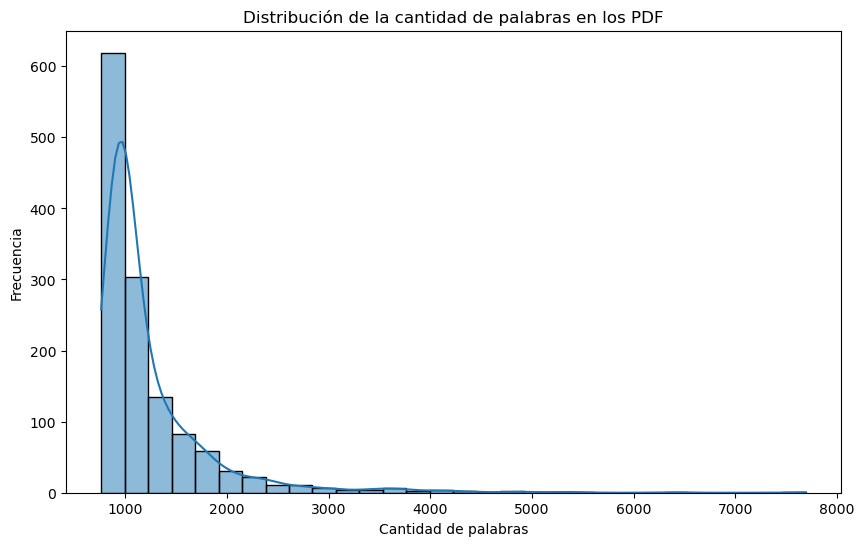

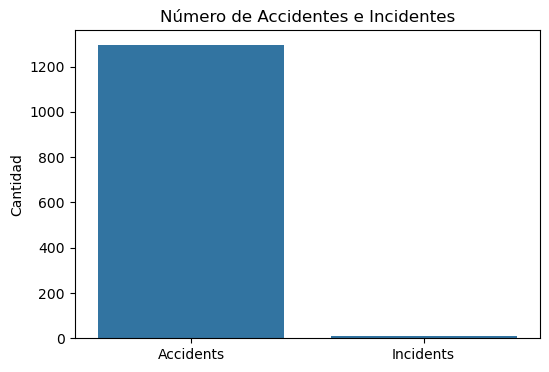

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de la cantidad de palabras
plt.figure(figsize=(10, 6))
sns.histplot(df['word_count'], bins=30, kde=True)
plt.title('Distribución de la cantidad de palabras en los PDF')
plt.xlabel('Cantidad de palabras')
plt.ylabel('Frecuencia')
plt.show()

# Contar la cantidad de accidentes e incidentes
accident_count = df['accident_number'].notnull().sum()
incident_count = df['incident_number'].notnull().sum()

plt.figure(figsize=(6, 4))
sns.barplot(x=['Accidents', 'Incidents'], y=[accident_count, incident_count])
plt.title('Número de Accidentes e Incidentes')
plt.ylabel('Cantidad')
plt.show()

Se crean dos graficos, primero uno histograma utilizando el conte de palabras, con esto podemos ver la distribucion en general de las palabras del conjunto de datos e incluso hacernos una idea longitudes del documento. El grafico muestra que la mayoria de reportes tienen alrededor de 1000 a 1500 palarbras para apartir de 2000 palabras ir disminuyendo..

El segundo grafico es un simple de graficos con la clasificacion de los reportes, mostrando que hay mayor cantidad de accidentes que incidentes.

El primer grafico nos da una idea de la longitud el segundo de la distribucion de eventos.

In [51]:
pip install wordcloud

   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   --- ----------------------------------- 30.7/300.2 kB 217.9 kB/s eta 0:00:02
   ------- ------------------------------- 61.4/300.2 kB 252.2 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 252.2 kB/s eta 0:00:01
   ------------------- ------------------ 153.6/300.2 kB 459.5 kB/s eta 0:00:01
   ----------------------- -------------- 184.3/300.2 kB 484.9 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 551.4 kB/s eta 0:00:01
   ---------------------------- --------- 225.3/300.2 kB 551.4 kB/s eta 0:00:01
   -------------------------------------  297.0/300.2 kB 573.4 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 563.0 kB

In [79]:
import nltk
from nltk.corpus import stopwords
from collections import Counter
# Descargar stopwords de NLTK si no están descargadas
nltk.download('stopwords')

def generate_top_words_bar_chart(text, top_n=10):
    stop_words = set(stopwords.words('english'))
    words = [word for word in text.split() if word.lower() not in stop_words]
    word_counts = Counter(words)
    most_common_words = word_counts.most_common(top_n)
    words, counts = zip(*most_common_words)
    
    plt.figure(figsize=(10, 5))
    plt.barh(words, counts, color='skyblue')
    plt.xlabel('Frequency')
    plt.ylabel('Words')
    plt.title(f'Top {top_n} de palabras mas comunes')
    plt.gca().invert_yaxis()
    plt.show()

# Función para extraer texto desde el término "Analysis"
def text_from_pdfs(pdf_folder):
    text = ""
    start_extracting = False
    for filename in os.listdir(pdf_folder):
        if filename.endswith(".pdf"):
            file_path = os.path.join(pdf_folder, filename)
            with fitz.open(file_path) as doc:
                for page in doc:
                    page_text = page.get_text()
                    if not start_extracting:
                        if re.search(r'\bAnalysis\b', page_text, re.IGNORECASE):
                            start_extracting = True
                    if start_extracting:
                        text += page_text
    return text

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Josh2\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Se crean dos funciones una para un grafico de barras y otro para extraer el texto pero a partir de una seccion en especifco del reporte, esta seccion seria desde analisis esto porque a partir de aqui es donde empieza el contenido lo que esta antes de esto son encabezados, esta extraccion es importante porque trataremos de visualizar frecuencias de palabras.

In [61]:
acc = text_from_pdfs(accident_folder)
inc = text_from_pdfs(incident_folder)
pdf = acc + inc

### 3.2 Frecuencias 

### Nube de Palabras 

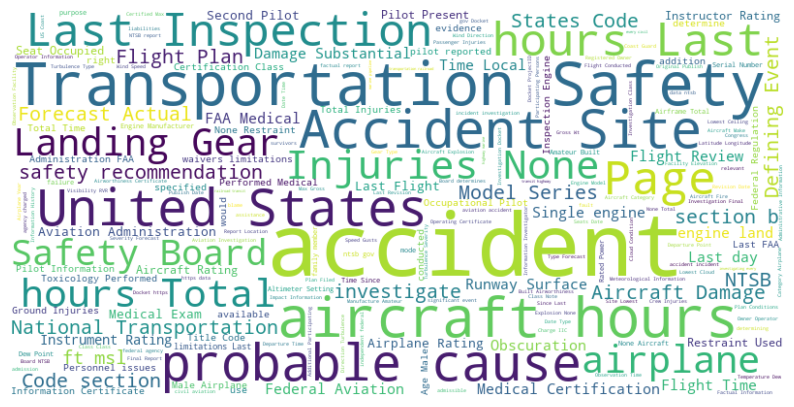

In [69]:
from wordcloud import WordCloud
# Crear un objeto WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=set(stopwords.words('english'))).generate(pdf)

# Mostrar la nube de palabras
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

Por utlimo se crea un grafico de palabras para hacernos una idea que palabras y frases son mas comunes en estos reportes, la nube de palabras ademas de palabras tambien muestra frases repetidas. 

En buena practica las palabras mas grades muestran mayores frecuencias.

### Grafico de barras 

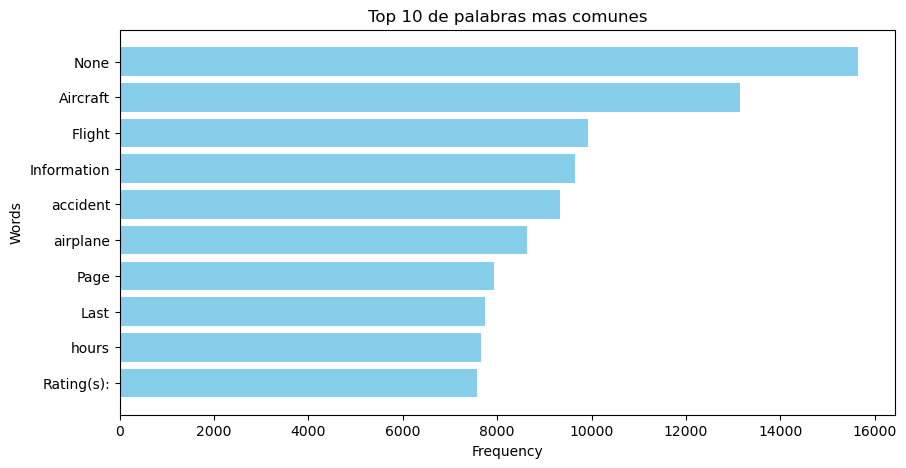

In [80]:
# Generar el gráfico de barras horizontal del top 10 palabras
generate_top_words_bar_chart(pdf, top_n=10)

Por ultimo se realizo un grafico de barras analizando tambien las frecuencias esto solo seria a nivel de palabras para darnos cuenta que palabras son mas comunes, para esto tambien se removieron las stopwords para no afectar la distribucion en la visualizacion y no terminar con terminar con articulos en el grafico ya que estos tienden a ser comunes.

## 4 Conclusion

Con este proceso pudimos obtener nuestros datos y tambien hacer un analisis exploratorio para conocer un poco como estan compuestos. Si bien este no es un analisis final con esto podemos hacernos una buena idea de que podria hacerse para explorar datos que son en su mayoria texto ya que si bien no es imposible cambia un poco el proceso ya que por ser textos no se puede aplicar el enfoque usual, como por ejemplo buscando patrones o relaciones en graficos de dispersion.

Con este analisis se pudo ver extension en palabras de los reportes que van de alrededor de 900 palabras a 5000 palabras, distribucion de eventos y por ultimo frecuencias de palabras en estos reportes.